# Solución de ejercicios liceo Volta 2020-21
Durante el año lectivo 2020-21 los estudiantes del Liceo del Gimnasio Alesandro Volta han respondido una encuesta al finalizar la solución de ejercicios propuestos por el profesor.

La encuesta es de google forms, y los resultados están guardados en una hoja de google sheets. Para su análisis se harán los siguientes pasos:
1. Obtener datos de la hoja de cálculo
2. Analizar por curso y por taller
3. Analizar por estudiante
4. ....

### Importando librerias necesarias

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *

## Autenticarse con google y obtener datos

In [78]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SPREADSHEET_ID = "1mpuSZwgZO_CAVO1g90UDQAri_rip98Hrs939t3Jpd5Q"
students_spreadsheet_id = "1rWju7T0eNFGi-FoIRgrF87-IsQu40AP087tzzKq8fyg"
RANGE_NAME = "Respuestas de formulario 1"
range_name2 = "Hoja 1"

In [79]:
data = pull_sheet_data(SCOPES, SPREADSHEET_ID, RANGE_NAME)
data2 = pull_sheet_data(SCOPES, students_spreadsheet_id, range_name2)

COMPLETE: Data copied
COMPLETE: Data copied


In [88]:
surveyDf = pd.DataFrame(data[1:], columns=data[0])
studentsDf = pd.DataFrame(data2[1:], columns = data2[0])

In [89]:
surveyDf.head()

,Marca temporal,Dirección de correo electrónico,Código taller,Cómo te fue: [Ejercicio 1],Cómo te fue: [Ejercicio 2],Cómo te fue: [Ejercicio 3],Cómo te fue: [Ejercicio 4],Cómo te fue: [Ejercicio 5]
0,3/9/2020 7:54:15,mattiapietro.canale@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Excelente,Excelente,Excelente
1,3/9/2020 8:04:52,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021001,Excelente,Bien,Excelente,Excelente,Bien
2,3/9/2020 8:05:03,davidalejandro.plazasr@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Excelente
3,3/9/2020 8:05:54,martin.polaniag@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Bien
4,3/9/2020 8:05:59,lauragabriela.gonzalezj@gimnasiovolta.edu.co,2202021001,Bien,Bien,Regular,Regular,Bien


In [90]:
studentsDf.head()

,Nombre,Curso,Correo
0,"Arámbula Jaimes, Nicolás Andrés",1,nicolasandres.arambulaj@gimnasiovolta.edu.co
1,"Castro Céspedes, Jorge Andrés",1,jorgeandres.castroc@gimnasiovolta.edu.co
2,"Castro Medina, Francisco",1,francisco.castrom@gimnasiovolta.edu.co
3,"Clavijo Rey, Mariana",1,mariana.clavijor@gimnasiovolta.edu.co
4,"Cotes Ontibón, Aníbal Santiago",1,anibalsantiago.coteso@gimnasiovolta.edu.co


## Limpiar los datos

### Asignar nombres y tipos de columnas adecuados

In [91]:
surveyDf.columns = ['dateTime', 'email', 'psCode',
       'problem1', 'problem2',
       'problem3', 'problem4',
       'problem5']

In [92]:
surveyDf.dtypes

dateTime    object
email       object
psCode      object
problem1    object
problem2    object
problem3    object
problem4    object
problem5    object
dtype: object

In [93]:
surveyDf['dateTime'] = surveyDf['dateTime'].astype('datetime64')

In [95]:
studentsDf.columns = ["nombre", "curso", "email"]

### Unir la base de datos de estudiantes con la encuesta

In [97]:
df = pd.merge(surveyDf, studentsDf, on="email")

## Tomar solo la respuesta mas reciente de cada estudiante en cada taller

In [100]:
df = df.loc[df.groupby(["curso",'nombre','psCode']).dateTime.idxmax()]

In [101]:
df.to_csv('cleanData.csv')

In [111]:
for psCode in df['psCode'].unique():
    
    print(psCode)

1202021001
2202021001
2202021002
3202021001
3202021002


In [115]:
problemas = ["problem1", "problem2", "problem3", "problem4", "problem5"]
for problema in problemas:
    df[problema].replace(["Excelente","Bien", "Regular", "No lo hice", "Mal"], [0,1,2,3,4], inplace = True)
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso
22,2020-03-09 12:08:36,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021001,2,0,1,0,1,"Arámbula Jaimes, Nicolás Andrés",1
23,2020-03-09 12:19:51,francisco.castrom@gimnasiovolta.edu.co,1202021001,4,1,4,1,0,"Castro Medina, Francisco",1
32,2020-03-09 13:54:37,mariana.clavijor@gimnasiovolta.edu.co,1202021001,2,0,2,0,1,"Clavijo Rey, Mariana",1
21,2020-03-09 12:02:35,anibalsantiago.coteso@gimnasiovolta.edu.co,1202021001,4,0,1,0,2,"Cotes Ontibón, Aníbal Santiago",1
46,2020-03-09 16:16:22,gabriela.jaramillor@gimnasiovolta.edu.co,1202021001,2,0,4,0,0,"Jaramillo Ruiz , Gabriela",1


## Calcular puntaje de dificultad que cada estudiante le asignó a cada taller

In [119]:
df['dificultad'] =df[problemas].sum(axis=1)

In [120]:
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso,dificultad
22,2020-03-09 12:08:36,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021001,2,0,1,0,1,"Arámbula Jaimes, Nicolás Andrés",1,4
23,2020-03-09 12:19:51,francisco.castrom@gimnasiovolta.edu.co,1202021001,4,1,4,1,0,"Castro Medina, Francisco",1,10
32,2020-03-09 13:54:37,mariana.clavijor@gimnasiovolta.edu.co,1202021001,2,0,2,0,1,"Clavijo Rey, Mariana",1,5
21,2020-03-09 12:02:35,anibalsantiago.coteso@gimnasiovolta.edu.co,1202021001,4,0,1,0,2,"Cotes Ontibón, Aníbal Santiago",1,7
46,2020-03-09 16:16:22,gabriela.jaramillor@gimnasiovolta.edu.co,1202021001,2,0,4,0,0,"Jaramillo Ruiz , Gabriela",1,6


## Estudiantes con mayor dificultad

<AxesSubplot:xlabel='nombre'>

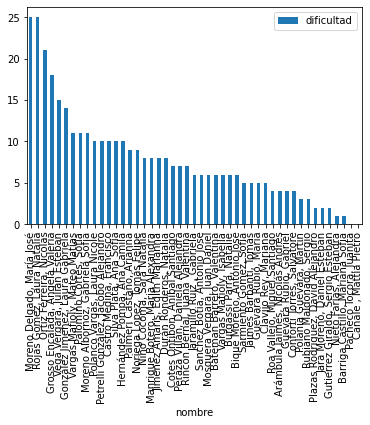

In [134]:
df[["nombre", "psCode", "dificultad"]].groupby(["nombre"]).sum().sort_values("dificultad", ascending=False).plot(kind="bar")

## Dificultad promedio por taller

## Número de talleres presentados por estudiante vs máximo clase

In [141]:
studentsDf['nombre']

0     Arámbula Jaimes, Nicolás Andrés
1       Castro Céspedes, Jorge Andrés
2            Castro Medina, Francisco
3                Clavijo Rey, Mariana
4      Cotes Ontibón, Aníbal Santiago
                   ...               
69               Mineo Pachón, Matteo
70            Ortolan Conto, Emanuela
71               Sánchez Páez, Felipe
72           Suárez Dolmen, Alejandro
73         Torres Prada, Sarah Elvira
Name: nombre, Length: 74, dtype: object

In [195]:
participation = df[["curso", "nombre", "psCode"]].groupby(["nombre","curso"]).count()
participation =participation.rename(columns={"psCode":"talleres"})

participation = participation.reset_index()

In [196]:
participation.index

RangeIndex(start=0, stop=47, step=1)

In [199]:
newStudents = []
for estudiante in studentsDf['nombre']:
    if estudiante not in list(df['nombre']):
        newStudent = {"nombre":estudiante, "curso":studentsDf.loc[studentsDf['nombre']==estudiante]['curso'].iloc[0], "talleres":0}
        newStudents.append(newStudent)
newDf = pd.DataFrame(newStudents)
participation = participation.append(newDf)

In [200]:
participation = participation.sort_values(by=["curso", "nombre"])

In [207]:
numTalleres = participation[["curso", "talleres"]].groupby('curso').max()
numTalleres

,talleres
curso,
1,1
2,2
3,2
4,0


In [201]:
participation["nota"] = 2+8*(participation['talleres']/participation[participation['curso']==]['talleres'].max())

,nombre,curso,talleres
0,"Arámbula Jaimes, Nicolás Andrés",1,1
0,"Castro Céspedes, Jorge Andrés",1,0
1,"Castro Medina, Francisco",1,1
2,"Clavijo Rey, Mariana",1,1
3,"Cotes Ontibón, Aníbal Santiago",1,1
...,...,...,...
22,"Mineo Pachón, Matteo",4,0
23,"Ortolan Conto, Emanuela",4,0
25,"Suárez Dolmen, Alejandro",4,0
24,"Sánchez Páez, Felipe",4,0


<AxesSubplot:xlabel='psCode'>

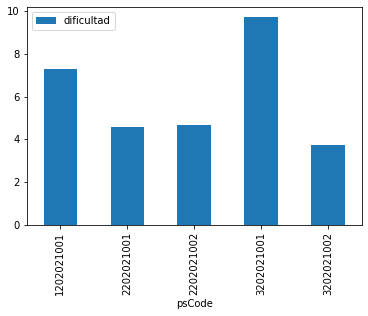

In [133]:
df[["psCode", "dificultad"]].groupby(['psCode']).mean().plot(kind="bar")

## Graficar diagramas de barras para cada taller

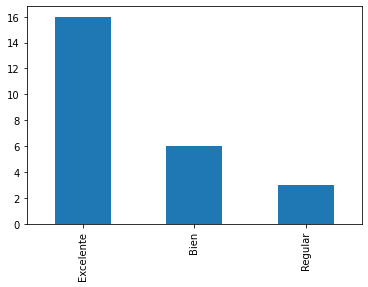

In [108]:
df[df['psCode']=="2202021001"]["problem1"].value_counts().plot(kind="bar");

In [114]:
df.groupby(["psCode", "problem1","problem2", "problem3", "problem4", "problem5" ]).count()

dateTime  \
psCode     problem1   problem2  problem3  problem4  problem5               
1202021001 Bien       Bien      Bien      Regular   Mal                1   
           Mal        Bien      Mal       Bien      Excelente          1   
                                Regular   Excelente No lo hice         1   
                      Excelente Bien      Excelente Regular            1   
           No lo hice Bien      Regular   Excelente Bien               1   
...                                                                  ...   
3202021002 Excelente  Bien      Bien      Regular   Mal                1   
                      Excelente Bien      Regular   Excelente          1   
                                Excelente Bien      Bien               1   
                                                    Excelente          1   
                                          Excelente Bien               1   

                                                                email  nombre  \
psCode     problem1   problem2  problem3  problem4  problem5                    
1202021001 Bien       Bien      Bien      Regular   Mal             1       1   
           Mal        Bien      Mal       Bien      Excelente       1       1   
                                Regular   Excelente No lo hice      1       1   
                      Excelente Bien      Excelente Regular         1       1   
           No lo hice Bien      Regular   Excelente Bien            1       1   
...                                                               ...     ...   
3202021002 Excelente  Bien      Bien      Regular   Mal             1       1   
                      Excelente Bien      Regular   Excelente       1       1   
                                Excelente Bien      Bien            1       1   
                                                    Excelente       1       1   
                                          Excelente Bien            1       1   

                                                                curso  
psCode     problem1   problem2  problem3  problem4  problem5           
1202021001 Bien       Bien      Bien      Regular   Mal             1  
           Mal        Bien      Mal       Bien      Excelente       1  
                                Regular   Excelente No lo hice      1  
                      Excelente Bien      Excelente Regular         1  
           No lo hice Bien      Regular   Excelente Bien            1  
...                                                               ...  
3202021002 Excelente  Bien      Bien      Regular   Mal             1  
                      Excelente Bien      Regular   Excelente       1  
                                Excelente Bien      Bien            1  
                                                    Excelente       1  
                                          Excelente Bien            1  

[61 rows x 4 columns]